In [1]:
from env import *
from tabulate import tabulate

Reward for this grid： 
- move：0
- out of the grid：-1
- special states：10 or 5，w.r.t. different states

In [2]:
grid = Grid(size=(5, 5), special_states={(0, 1): (10, (4, 1)),
                                         (0, 3): (5, (2, 3))})
agent = Agent(grid.valid_states, (3, 4))

policy = agent.random_policy

###  Solve state-value function

In [3]:
gamma = 0.9
agent.reset_state_values()
for i in range(20):
    new_state_value = agent.state_value.copy()
    for state in grid.valid_states:
        backups = []
        for action in agent.action_set:
            p_a = 1 / len(agent.action_set)
            next_state, reward = grid.reward(state, action)
            new_value = p_a * (reward + gamma * agent.state_value[next_state])
            backups.append(new_value)
        new_state_value[state] = sum(backups)
    agent.state_value = new_state_value
table = np.around(show_values((5, 5), agent.state_value), decimals=1)
print(table)

[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.6]
 [ 0.1  0.8  0.7  0.4 -0.4]
 [-1.  -0.4 -0.3 -0.6 -1.2]
 [-1.8 -1.3 -1.2 -1.4 -2. ]]


### in-place version

In [4]:
agent.reset_state_values()
gamma = 0.9
for i in range(15):
    for state in grid.valid_states:
        backups = []
        for action in agent.action_set:
            p_a = 1 / len(agent.action_set)
            next_state, reward = grid.reward(state, action)
            new_value = p_a * (reward + gamma * agent.state_value[next_state])
            backups.append(new_value)
        agent.state_value[state] = sum(backups)
table = np.around(show_values((5, 5), agent.state_value), decimals=1)
print(table)

[[ 3.4  8.8  4.5  5.4  1.5]
 [ 1.6  3.   2.3  2.   0.6]
 [ 0.1  0.8  0.7  0.4 -0.4]
 [-0.9 -0.4 -0.3 -0.5 -1.1]
 [-1.8 -1.3 -1.2 -1.4 -1.9]]


### Optimal state-value function
Value iteration

In [5]:
gamma = 0.9
agent.reset_state_values()
for i in range(500):
    new_state_value = agent.state_value.copy()
    for state in grid.valid_states:
        backups = []
        for action in agent.action_set:
            p_a = 1 # Transition prob is 1.0
            next_state, reward = grid.reward(state, action)
            new_value = p_a * (reward + gamma * agent.state_value[next_state])
            backups.append(new_value)
        new_state_value[state] = max(backups)
    agent.state_value = new_state_value
table = np.around(show_values((5, 5), agent.state_value), decimals=1)
print(table)

[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]


### Grid world from Example 4.1

Reward for this grid： 
- move：-1
- terminal state：0

In [6]:
grid = Grid2(size=(4, 4), special_states={(0, 0): (0, (0, 0)),
                                         (3, 3): (0, (3, 3))})
agent = Agent(grid.valid_states, (1, 1))

In [7]:
table = np.around(show_values((4, 4), agent.state_value), decimals=1)
print(table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Iterative policy evaluation

This is an *undiscounted* task.

0.25
Step 1 -----------------------
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]


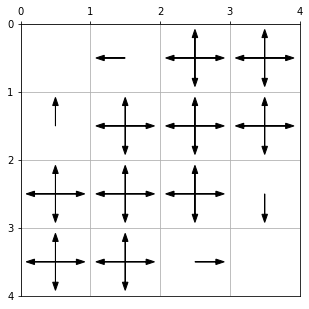

0.75
Step 2 -----------------------
[[ 0.  -1.8 -2.  -2. ]
 [-1.8 -2.  -2.  -2. ]
 [-2.  -2.  -2.  -1.8]
 [-2.  -2.  -1.8  0. ]]


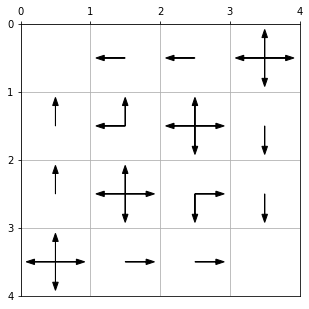

1.55
Step 3 -----------------------
[[ 0.  -2.4 -3.  -3. ]
 [-2.4 -2.9 -3.  -3. ]
 [-3.  -3.  -2.9 -2.4]
 [-3.  -3.  -2.4  0. ]]


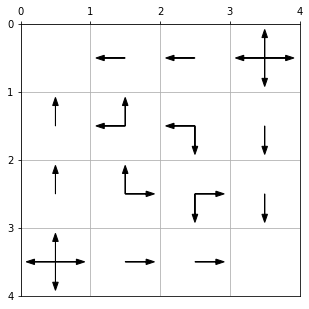

2.15
Step 4 -----------------------
[[ 0.  -3.1 -3.8 -4. ]
 [-3.1 -3.7 -4.  -3.8]
 [-3.8 -4.  -3.7 -3.1]
 [-4.  -3.8 -3.1  0. ]]


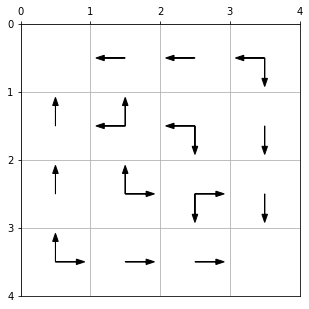

2.85
Step 5 -----------------------
[[ 0.  -3.6 -4.7 -4.9]
 [-3.6 -4.6 -4.8 -4.7]
 [-4.7 -4.8 -4.6 -3.6]
 [-4.9 -4.7 -3.6  0. ]]


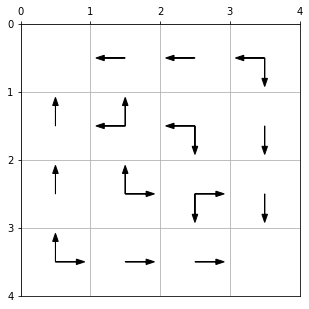

3.5500000000000003
Step 6 -----------------------
[[ 0.  -4.2 -5.5 -5.8]
 [-4.2 -5.2 -5.6 -5.5]
 [-5.5 -5.6 -5.2 -4.2]
 [-5.8 -5.5 -4.2  0. ]]


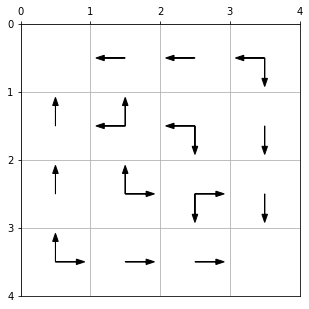

4.2
Step 7 -----------------------
[[ 0.  -4.7 -6.3 -6.6]
 [-4.7 -5.9 -6.4 -6.3]
 [-6.3 -6.4 -5.9 -4.7]
 [-6.6 -6.3 -4.7  0. ]]


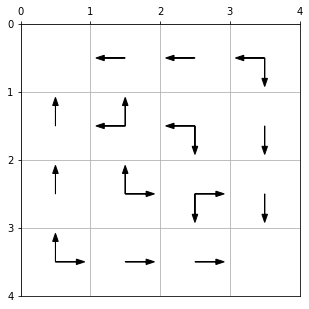

4.875
Step 8 -----------------------
[[ 0.  -5.2 -7.  -7.4]
 [-5.2 -6.6 -7.1 -7. ]
 [-7.  -7.1 -6.6 -5.2]
 [-7.4 -7.  -5.2  0. ]]


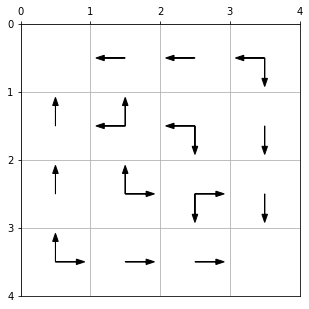

5.45
Step 9 -----------------------
[[ 0.  -5.7 -7.7 -8.2]
 [-5.7 -7.2 -7.8 -7.7]
 [-7.7 -7.8 -7.2 -5.7]
 [-8.2 -7.7 -5.7  0. ]]


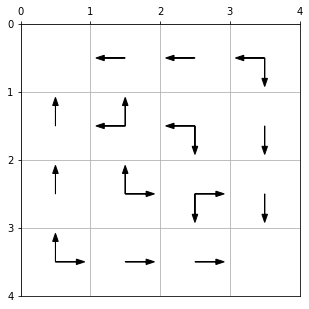

6.025
Step 10 -----------------------
[[ 0.  -6.1 -8.4 -9. ]
 [-6.1 -7.8 -8.4 -8.4]
 [-8.4 -8.4 -7.8 -6.1]
 [-9.  -8.4 -6.1  0. ]]


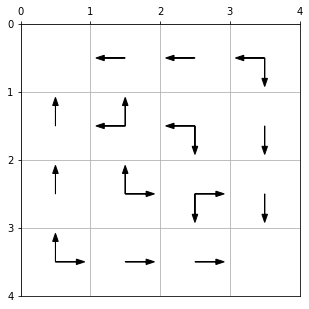

In [40]:
agent.reset_state_values()
delta = 0
gamma = 1
for i in range(10):
    delta = 0
    new_state_value = agent.state_value.copy()
    for state in grid.valid_states:
        v = agent.state_value[state]
        backups = []
        for action in agent.action_set:
            p_a = 0.25
            p_s_r = 1
            next_state, reward = grid.reward(state, action)
            new_value = p_a * p_s_r * (reward + gamma * agent.state_value[next_state])
            backups.append(new_value)
        new_state_value[state] = np.round(sum(backups), decimals=1)
        delta = max(delta, abs(v - new_value))
        
    agent.state_value = new_state_value
    if delta < 0.1:
        break
    print("Step {} -----------------------".format(i+1))
    table = np.around(show_values((4, 4), agent.state_value), decimals=1)
    print(table)
    transitions = grid.move
    policy = {}
    for state in agent.state_value.keys():
        policy[state] = agent.greedy_policy(state, transitions)
    draw_policy(policy, gridsize=(4, 4), special_states=[(0, 0), (3, 3)])

### Policy Iteration

Step 1 -----------------------
[[ 0.  -1.  -9.1 -9.1]
 [-9.1 -9.1 -9.1 -9.1]
 [-9.1 -9.1 -9.1 -9.1]
 [-9.1 -9.1 -9.1  0. ]]


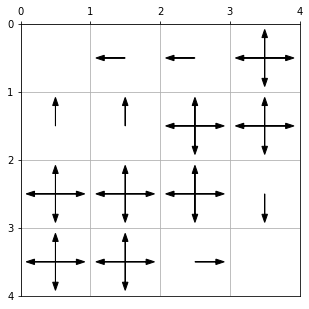

Step 2 -----------------------
[[ 0.  -1.  -1.9 -4.2]
 [-1.  -1.9 -3.4 -3.8]
 [-4.4 -4.2 -3.2 -1. ]
 [-5.5 -4.4 -1.   0. ]]


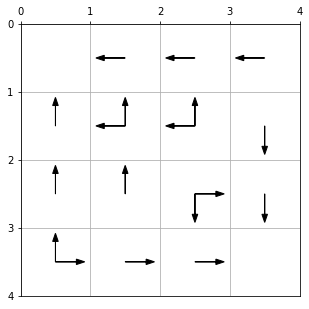

Step 3 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


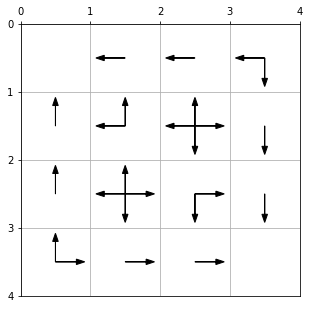

Step 4 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


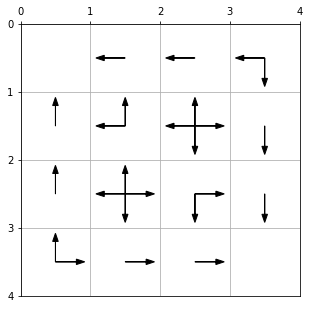

Step 5 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


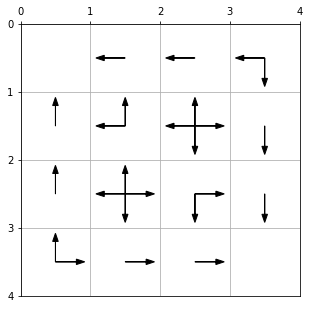

Step 6 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


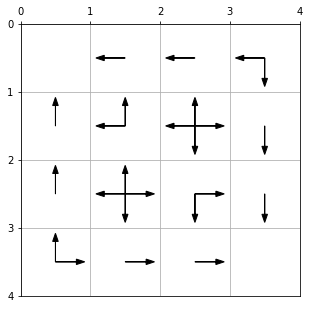

Step 7 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


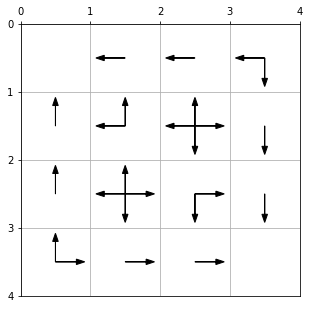

Step 8 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


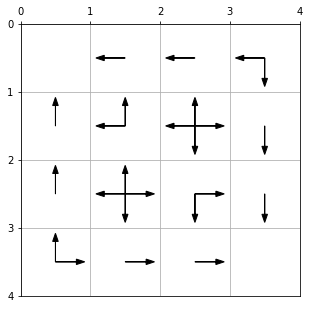

Step 9 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


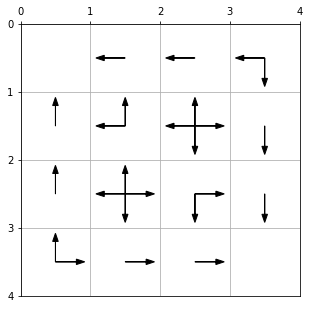

Step 10 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


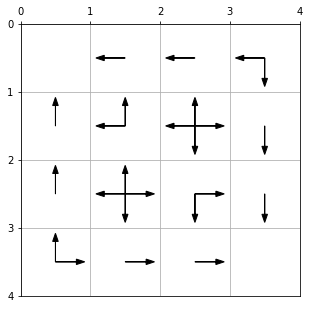

In [32]:
agent.reset_state_values()
delta = 0
gamma = 0.9

action_set = ['north', 'south', 'east', 'west']
policy = {}
for state in grid.valid_states:
    random_action = np.random.choice(action_set)
    policy[state] = [random_action]

for i in range(10):
    # Policy Evaluation
    while True:
        delta = 0
        new_state_value = agent.state_value.copy()
        for state in grid.valid_states:
            v = agent.state_value[state]
            new_values = []
            for action in policy[state]:
                p_s_r = 1 / len(policy[state])
                next_state, reward = grid.reward(state, action)
                new_v = p_s_r * (reward + gamma * agent.state_value[next_state])
                new_values.append(new_v)
            
            new_value = sum(new_values)
            new_state_value[state] = np.round(new_value, decimals=1)
            delta = max(delta, abs(v - new_value))
        agent.state_value = new_state_value
        if delta < 0.1:
            break
            
    # Policy Improvement
    policy_stable = True
    for state in grid.valid_states:
        old_action = policy[state][0]
        policy[state] = agent.greedy_policy(state, transitions=grid.move)
        if old_action != policy[state]:
            policy_stable = False
    
    if policy_stable:
        break
        
    print("Step {} -----------------------".format(i+1))
    table = np.around(show_values((4, 4), agent.state_value), decimals=1)
    print(table)
    draw_policy(policy, gridsize=(4, 4), special_states=[(0, 0), (3, 3)])

### Value Iteration

Step 1 -----------------------
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]


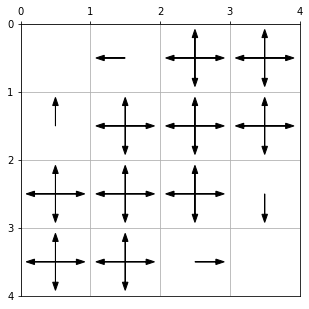

Step 2 -----------------------
[[ 0.  -1.  -1.9 -1.9]
 [-1.  -1.9 -1.9 -1.9]
 [-1.9 -1.9 -1.9 -1. ]
 [-1.9 -1.9 -1.   0. ]]


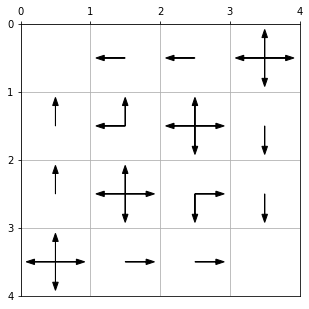

Step 3 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


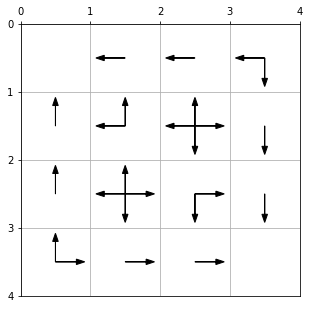

Step 4 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


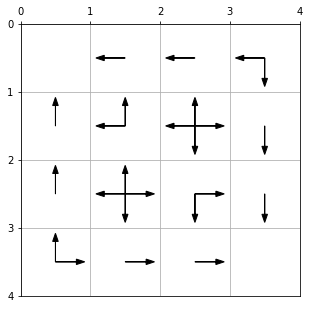

Step 5 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


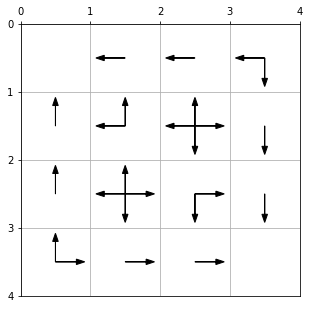

Step 6 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


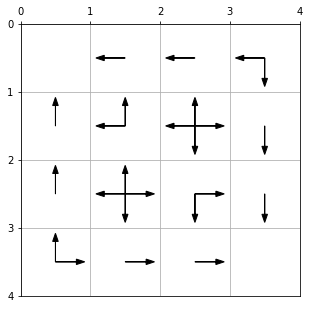

Step 7 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


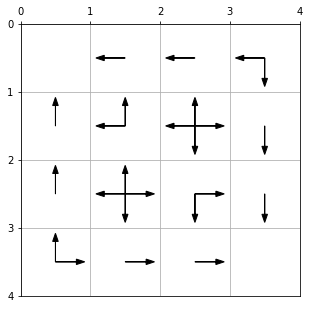

Step 8 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


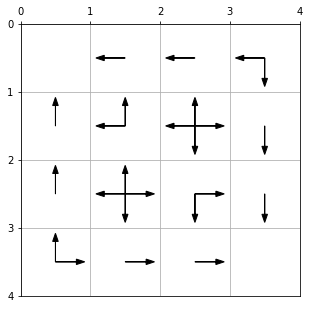

Step 9 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


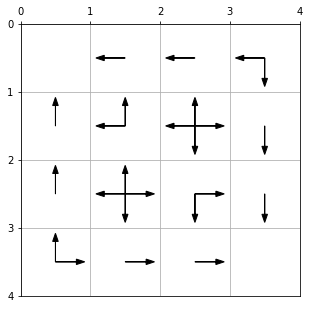

Step 10 -----------------------
[[ 0.  -1.  -1.9 -2.7]
 [-1.  -1.9 -2.7 -1.9]
 [-1.9 -2.7 -1.9 -1. ]
 [-2.7 -1.9 -1.   0. ]]


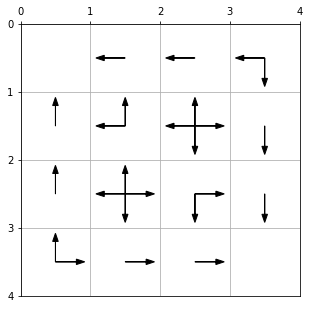

In [44]:
agent.reset_state_values()
delta = 0
gamma = 0.9
for i in range(10):
    delta = 0
    new_state_value = agent.state_value.copy()
    for state in grid.valid_states:
        v = agent.state_value[state]
        backups = []
        for action in agent.action_set:
            p_s_r = 1
            next_state, reward = grid.reward(state, action)
            new_value = p_s_r * (reward + gamma * agent.state_value[next_state])
            backups.append(new_value)
        new_state_value[state] = max(backups)
        delta = max(delta, abs(v - new_value))
        
    agent.state_value = new_state_value
    if delta < 0.1:
        break
    print("Step {} -----------------------".format(i+1))
    table = np.around(show_values((4, 4), agent.state_value), decimals=1)
    print(table)
    transitions = grid.move
    policy = {}
    for state in agent.state_value.keys():
        policy[state] = agent.greedy_policy(state, transitions)
    draw_policy(policy, gridsize=(4, 4), special_states=[(0, 0), (3, 3)])